 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv (csv_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path = Path ("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv (csv_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csv_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv (csv_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")


/var/folders/lf/whg_48ks3j11dcfnxg6ckl640000gn/T/ipykernel_6084/2051223909.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


In [11]:
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
# Calculate Daily Returns
sp500_df["Close"].pct_change()
sp500_df["Close"]=sp500_df["Close"].pct_change()

In [13]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns=["S&P500"]
sp500_df

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dfs = pd.concat([algo_df,whale_df, sp500_df], axis="columns", join="inner")
combined_dfs

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

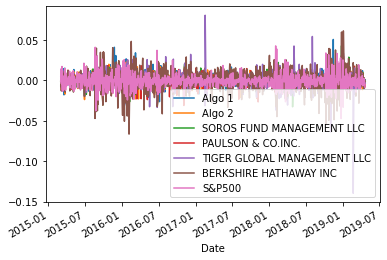

In [16]:
# Plot daily returns of all portfolios
combined_dfs.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

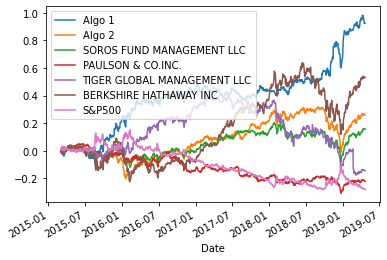

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_dfs).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

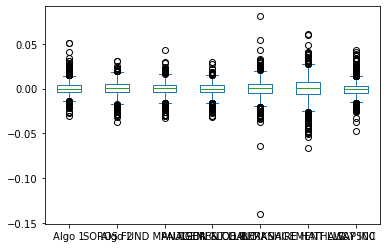

In [18]:
# Box plot to visually show risk

#df.boxplot(by ='size', column =['tip'], grid = False)

#sp500_df.boxplot(by ='Date', column =['S&P500'], grid = False)

combined_dfs.plot(kind='box')

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_dfs.std()

Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
combined_dfs["S&P500"].std()
# Determine which portfolios are riskier than the S&P 500
combined_dfs.std() < combined_dfs["S&P500"].std()

Algo 1                          True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
combined_dfs.std() * np.sqrt(252)

Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

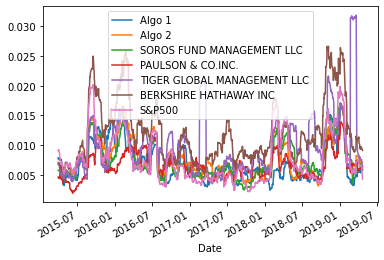

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_dfs.rolling(21).std()
# Plot the rolling standard deviation
combined_dfs.rolling(21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

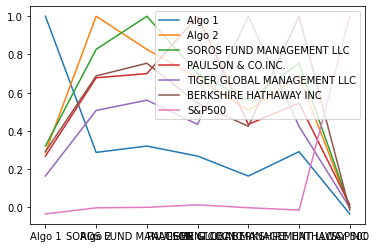

In [23]:
# Calculate the correlation
correlation = combined_dfs.corr()
# Display de correlation matrix
combined_dfs.corr().plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [77]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_dfs['Algo 1'].cov(combined_dfs['S&P500'])
algo1_covariance
# Calculate variance of S&P 500
variance = combined_dfs['S&P500'].var()
variance
# Computing beta
combined_dfs_beta = algo1_covariance / variance
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
combined_dfs.ewm(halflife=21).std()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.004700,0.002380,0.002472,0.005814,0.001441,0.007624,0.003962
2015-03-05,0.004162,0.002662,0.002677,0.004968,0.002478,0.007020,0.007961
2015-03-06,0.003419,0.007166,0.005349,0.004615,0.004665,0.009387,0.008178
2015-03-09,0.002999,0.006290,0.004638,0.004471,0.005496,0.008066,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.006880,0.008065,0.007755,0.006960,0.016572,0.012136,0.007823
2019-04-16,0.006922,0.007938,0.007632,0.006846,0.016301,0.011939,0.007721
2019-04-17,0.007097,0.007896,0.007547,0.006846,0.016047,0.011746,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_dfs.mean() * 252 / (combined_dfs * np.sqrt(252))
sharpe_ratios.head()


,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
Date,,,,,,,
2015-03-03,-5.375530,-4.254891,-2.139499,0.693200,2.862942,-1.193294,-1.010245
2015-03-04,-1.215530,1.672017,1.214197,-1.065164,0.559863,1.860508,3.727469
2015-03-05,-10.931334,0.934489,0.674191,-0.847019,-0.602500,1.165325,-0.309716
2015-03-06,-2.106213,-0.352516,-0.342496,0.965994,0.167274,-0.598436,1.133380
2015-03-09,-1.916625,3.099970,4.649917,-0.817079,-0.242811,-4.743461,-0.258085


<AxesSubplot:xlabel='Date'>

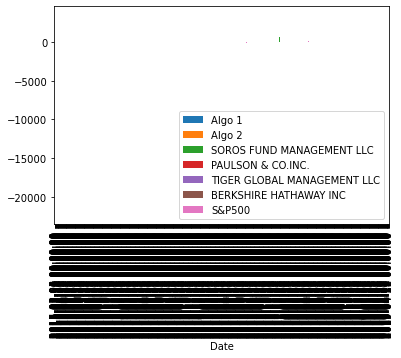

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
csv_path = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv (csv_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [29]:
# Reading data from 2nd stock
csv_path = Path("../Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv (csv_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [30]:
# Reading data from 3rd stock
csv_path = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv (csv_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [31]:
# Combine all stocks in a single DataFrame
combined_dfss = pd.concat([aapl_df,cost_df, goog_df], axis="columns", join="inner")
combined_dfss

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [32]:
combined_dfss = combined_dfss.drop(columns = ['Symbol'])
combined_dfss

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [33]:
# Reset Date index
#combined_dfs.reset_index("Trade DATE")
#combined_dfs=combined_dfs.reset_index

In [34]:
# Reorganize portfolio data by having a column per symbol
#combined_dfs.sort_index('AAPL','GOOG','COST')
combined_dfss.columns = ["AAPL", "COST", "GOOG"]
combined_dfss

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [35]:
#Identify data types

combined_dfss.dtypes

AAPL    float64
COST    float64
GOOG    float64
dtype: object

In [48]:
# Calculate daily returns
daily_returns = combined_dfss.pct_change()
daily_returns.head()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226
...,...,...,...
2018-05-17,0.003650,0.003217,0.011469
2018-05-16,0.006364,-0.004459,0.002948
2018-05-15,-0.009246,-0.016255,-0.002348


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

portfolio_returns = daily_returns.dot(weights)
daily_returns.head()
# Calculate portfolio return
portfolio_returns = portfolio_returns.pct_change()
# Display sample data
portfolio_returns.head()

Trade DATE
2019-05-08          NaN
2019-05-07    -0.686741
2019-05-06    32.676304
2019-05-03    -0.758163
2019-05-02    -3.828575
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [69]:
# Join your returns DataFrame to the original returns DataFrame
returns_df = pd.concat([combined_dfss, combined_dfs], axis="columns", join="inner")
returns_df

,AAPL,COST,GOOG,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
2019-04-22,204.53,243.42,1248.84,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764
2019-04-18,203.86,245.81,1236.37,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,-0.001011
2019-04-17,203.13,245.56,1236.34,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577
2019-04-16,199.25,245.34,1227.13,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-15,199.23,246.33,1221.10,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
...,...,...,...,...,...,...,...,...,...,...
2018-05-17,186.99,199.60,1078.59,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-16,188.18,198.71,1081.77,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-15,186.44,195.48,1079.23,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-14,188.15,195.88,1100.20,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.006889


In [70]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df.dropna(inplace=True)
returns_df

,AAPL,COST,GOOG,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
2019-04-22,204.53,243.42,1248.84,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764
2019-04-18,203.86,245.81,1236.37,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,-0.001011
2019-04-17,203.13,245.56,1236.34,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577
2019-04-16,199.25,245.34,1227.13,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-15,199.23,246.33,1221.10,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
...,...,...,...,...,...,...,...,...,...,...
2018-05-17,186.99,199.60,1078.59,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-16,188.18,198.71,1081.77,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-15,186.44,195.48,1079.23,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-14,188.15,195.88,1100.20,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.006889


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [71]:
# Calculate the annualized `std`
returns_df_annual = returns_df.std() * np.sqrt(252)
returns_df_annual

AAPL                            345.112320
COST                            219.950141
GOOG                           1055.438182
Algo 1                            0.133645
Algo 2                            0.139204
SOROS FUND MANAGEMENT LLC         0.146589
PAULSON & CO.INC.                 0.116683
TIGER GLOBAL MANAGEMENT LLC       0.232434
BERKSHIRE HATHAWAY INC            0.246819
S&P500                            0.152147
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

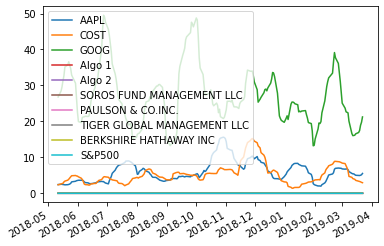

In [72]:
# Calculate rolling standard deviation
returns_df.rolling(window=21).std()
# Plot rolling standard deviation
returns_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

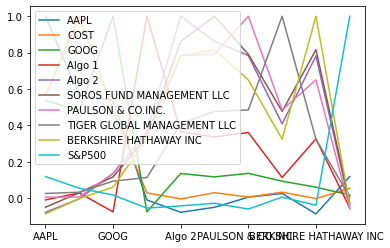

In [75]:
# Calculate and plot the correlation
returns_df.corr()
returns_df.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
# Calculate and plot Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualized Sharpe Ratios

sharpe_ratio = daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
sharpe_ratio

AAPL   -0.061751
COST   -0.929405
GOOG   -0.084987
dtype: float64

<AxesSubplot:>

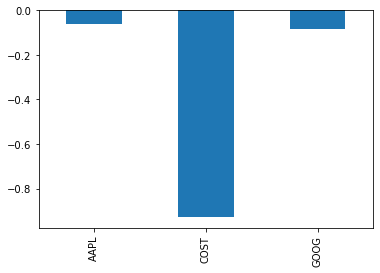

In [84]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!